In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/content/Telecust1.csv')

In [3]:
# Explore the dataset
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, check for missing values

   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int6

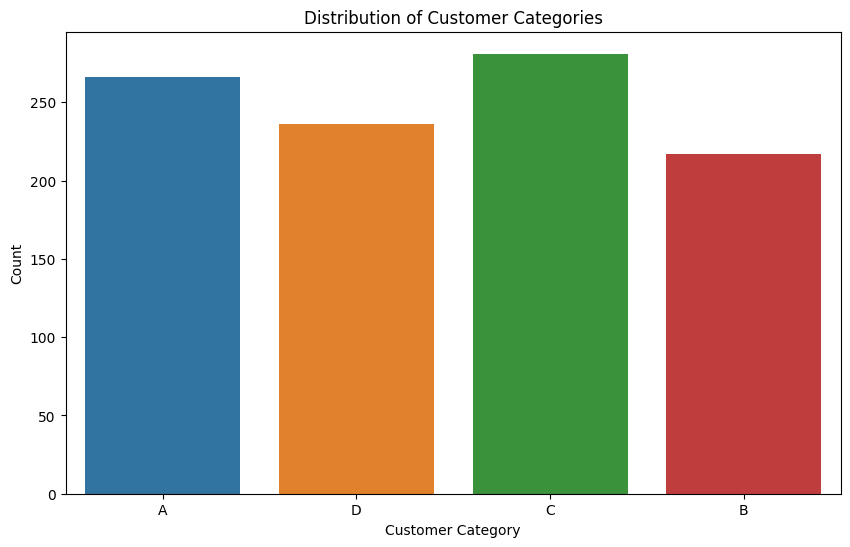

In [21]:
#Exploratory Analysis
# Set the target variable
target_variable = 'custcat'

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target_variable, data=data)
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()





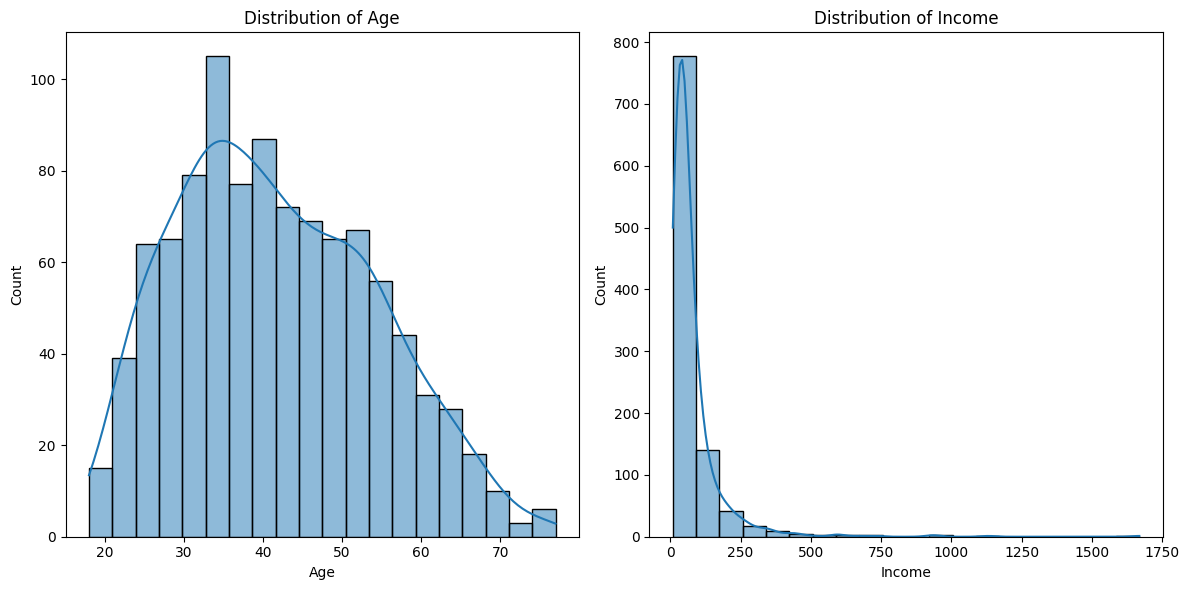

In [12]:
# Key Variable 1: Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Key Variable 2: Income
plt.subplot(1, 2, 2)
sns.histplot(data['income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



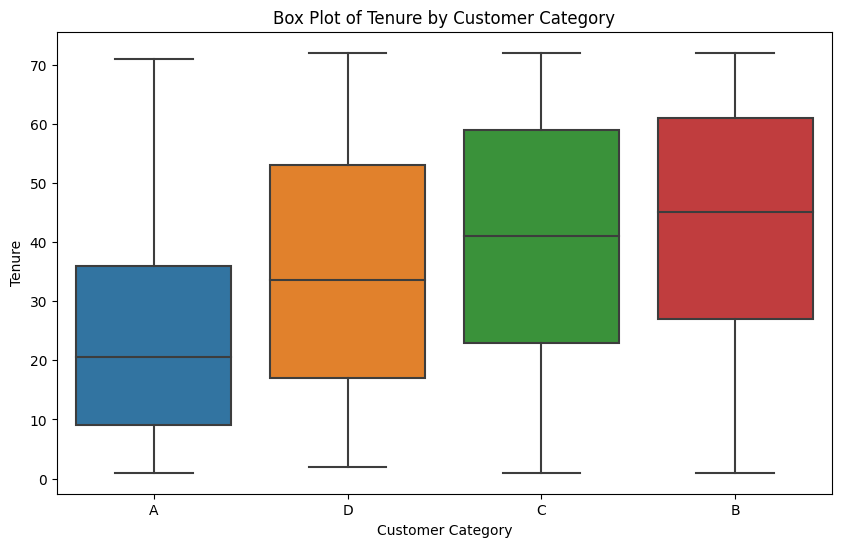

In [16]:
# Box plot for tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[target_variable], y=data['tenure'])
plt.title('Box Plot of Tenure by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Tenure')
plt.show()


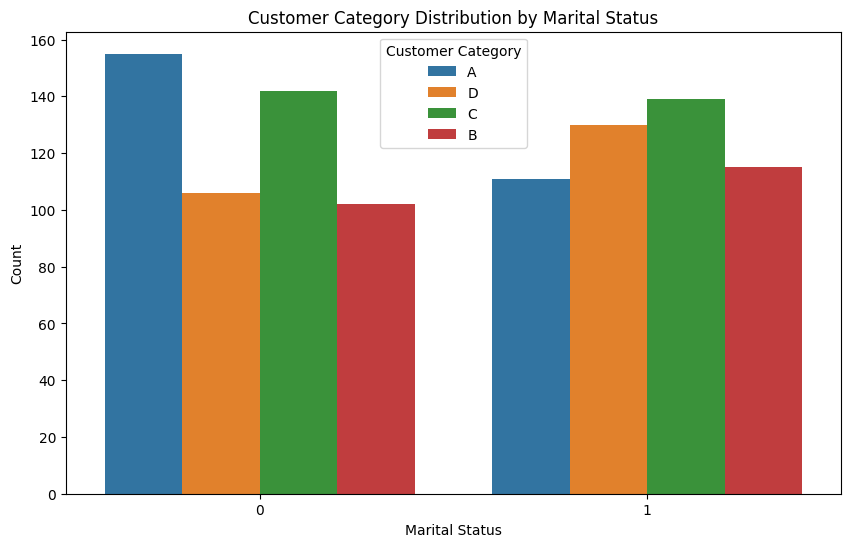

In [18]:
# Bar plot for Marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue=target_variable, data=data)
plt.title('Customer Category Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Customer Category')
plt.show()


In [22]:
# Check for missing values in the dataset
print("Missing Values:\n", data.isnull().sum())
# No missing values, so no need for imputation


Missing Values:
 region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
data['custcat_encoded'] = label_encoder.fit_transform(data['custcat'])


In [24]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features for scaling
numerical_features = ['tenure', 'age', 'income', 'address', 'employ']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['region',  'tenure',  'age',  'income',  'marital',  'address',  'ed',  'employ', 'retire',  'gender', 'reside' ,'custcat' ]

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features (X) and target variable (y)
target_variable = 'custcat'
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Specify the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_model.fit(X_train_scaled, y_train)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 1.0


In [36]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Model Precision:", precision_dt)

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Model Recall:", recall_dt)


Decision Tree Model Precision: 1.0
Decision Tree Model Recall: 1.0


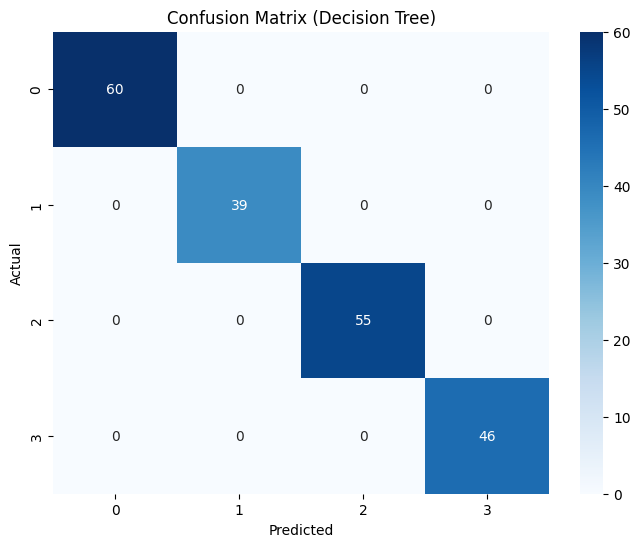

In [40]:
import seaborn as sns

# Predictions
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='g', cmap='Blues', xticklabels=best_dt_model.classes_, yticklabels=best_dt_model.classes_)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
